## 하이퍼 파라미터 최적화
하이퍼 파라미터: 모델의 학습을 통해 최적화되는 파라미터가 아닌, 사용자가 직접 설정해야 하는 파라미터

val acc:0.06 | lr:4.527048518998853e-05, weight decay:2.801852476924681e-07
val acc:0.05 | lr:7.157330290370924e-05, weight decay:1.953515452159511e-05
val acc:0.21 | lr:0.0006932891568039424, weight decay:5.1515803565344145e-05
val acc:0.21 | lr:0.0011480708218999647, weight decay:1.2832962138835525e-05
val acc:0.07 | lr:0.00017194591892760952, weight decay:1.5880118234931323e-08
val acc:0.17 | lr:0.0005635848924766939, weight decay:5.176932113054944e-08
val acc:0.06 | lr:1.3675150687137932e-05, weight decay:1.203054086125288e-06
val acc:0.13 | lr:2.336600841265066e-06, weight decay:1.6584848244344757e-07
val acc:0.08 | lr:4.1816983683263645e-06, weight decay:2.0781006039955425e-05
val acc:0.21 | lr:0.0012656440332687979, weight decay:2.2843735620339674e-07
val acc:0.09 | lr:2.2662518942817884e-05, weight decay:5.97235483300711e-07
val acc:0.13 | lr:2.048059988899781e-06, weight decay:2.327018231445914e-06
val acc:0.09 | lr:3.811342338050936e-05, weight decay:1.4743936454833487e-06
va

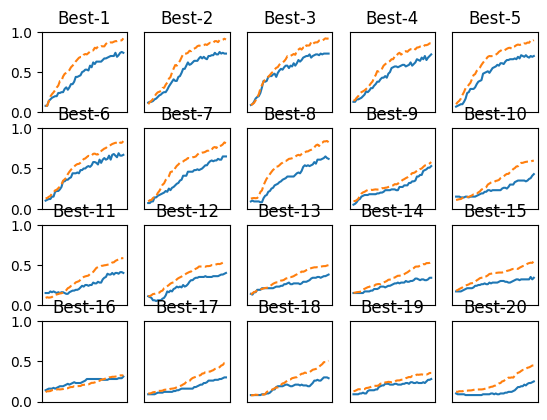

In [1]:
# coding: utf-8
import sys, os

sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 결과를 빠르게 얻기 위해 훈련 데이터를 줄임
x_train = x_train[:500]
t_train = t_train[:500]

# 20%를 검증 데이터로 분할
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(
        input_size=784,
        hidden_size_list=[100, 100, 100, 100, 100, 100],
        output_size=10,
        weight_decay_lambda=weight_decay,
    )
    trainer = Trainer(
        network,
        x_train,
        t_train,
        x_val,
        t_val,
        epochs=epocs,
        mini_batch_size=100,
        optimizer="sgd",
        optimizer_param={"lr": lr},
        verbose=False,
    )
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# 하이퍼파라미터 무작위 탐색======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 탐색한 하이퍼파라미터의 범위 지정===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print(
        "val acc:"
        + str(val_acc_list[-1])
        + " | lr:"
        + str(lr)
        + ", weight decay:"
        + str(weight_decay)
    )
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# 그래프 그리기========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(
    results_val.items(), key=lambda x: x[1][-1], reverse=True
):
    print("Best-" + str(i + 1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i + 1)
    plt.title("Best-" + str(i + 1))
    plt.ylim(0.0, 1.0)
    if i % 5:
        plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()